In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import detrend

In [2]:
ar_df_1 = pd.read_csv('arma_series01.csv')
ar_df_1.head()

,Date,Y
0,01MAY1992,100.04
1,01JUN1992,100.32
2,01JUL1992,100.16
3,01AUG1992,100.24
4,01SEP1992,100.14


<Axes: xlabel='DATE'>

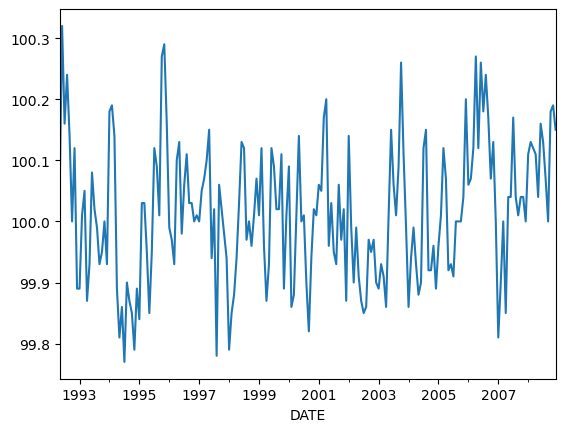

In [4]:
ar_df_1['DATE'] = pd.to_datetime(ar_df_1['Date'], format='%d%b%Y')

ar_ts_1 = pd.Series(ar_df_1['Y'].values, index=ar_df_1['DATE'])

ar_ts_1.plot()

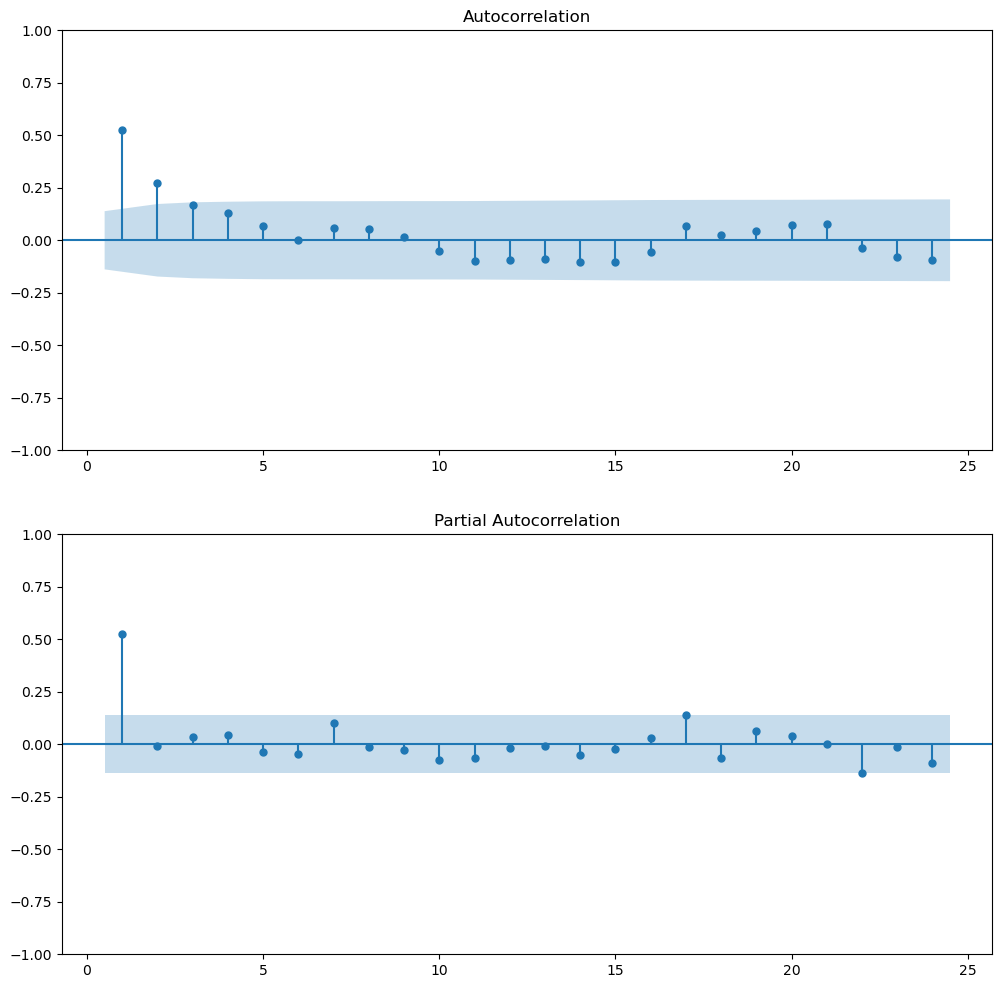

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(ar_ts_1, ax=ax1, zero=False)
plot_pacf(ar_ts_1, ax=ax2, zero=False)
plt.show()

In [6]:
sm.stats.acorr_ljungbox(ar_ts_1, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,83.341864,1.107480e-13


In [7]:
adfuller(ar_ts_1, regression='c')

(-7.740472471884697,
 1.0652730156324102e-11,
 0,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -348.6741669523335)

In [8]:
fit_ar1 = ARIMA(ar_ts_1, order=(1,0,0)).fit()

print(fit_ar1.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 187.426
Date:                Mon, 30 Sep 2024   AIC                           -368.852
Time:                        10:18:59   BIC                           -358.957
Sample:                    05-01-1992   HQIC                          -364.847
                         - 12-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0149      0.014   6978.834      0.000      99.987     100.043
ar.L1          0.5275      0.067      7.863      0.000       0.396       0.659
sigma2         0.0090      0.001      9.902      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


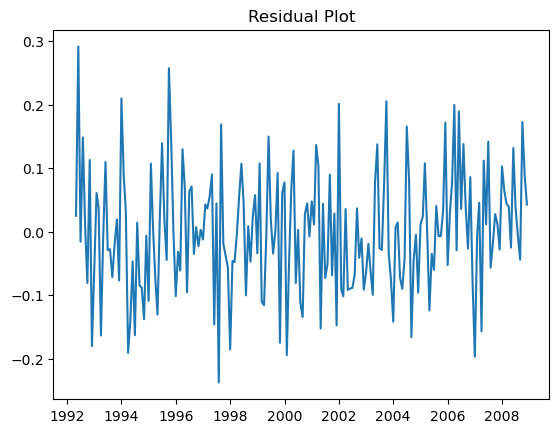

In [9]:
residuals = fit_ar1.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

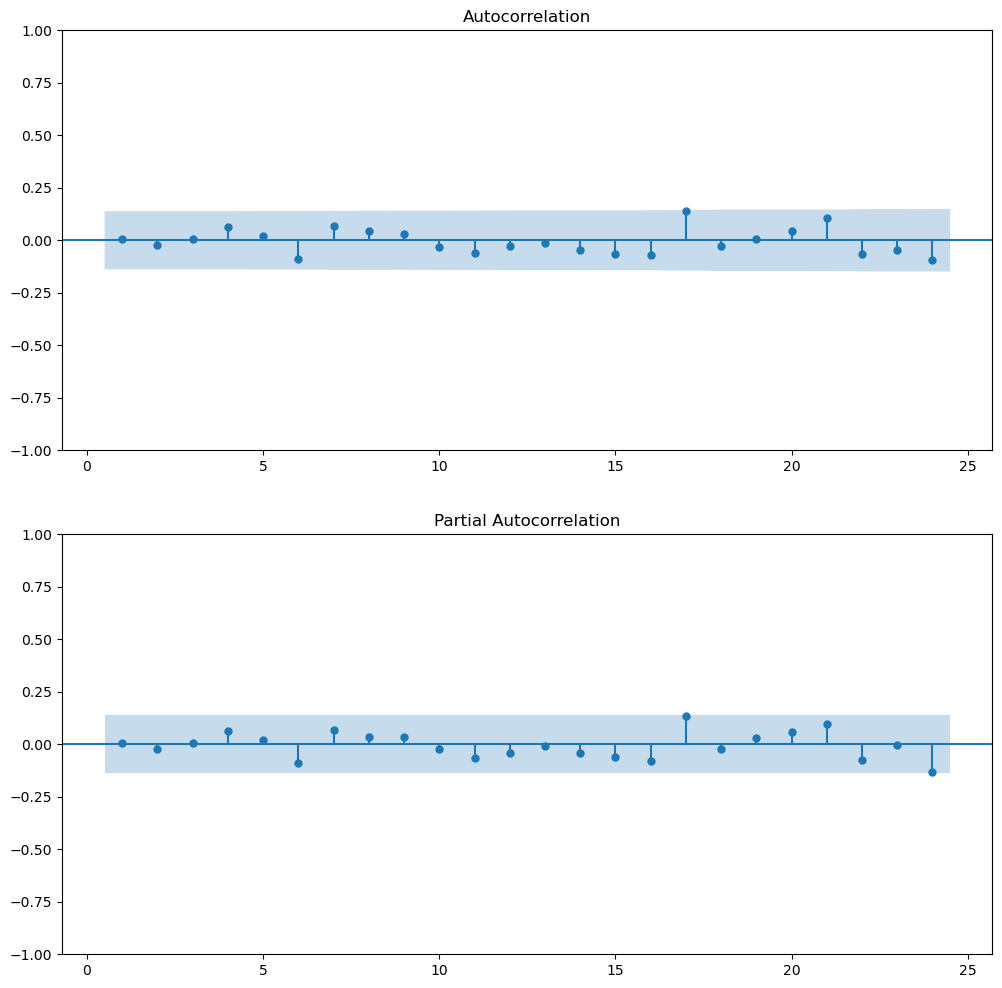

In [10]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()

In [11]:
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,4.384759,0.928325


In [12]:
ar_df_2 = pd.read_csv('arma_series02.csv')
ar_df_2.head()

,Date,Y
0,15JUN2008,98.02
1,16JUN2008,100.34
2,17JUN2008,99.36
3,18JUN2008,100.84
4,19JUN2008,100.26


<Axes: xlabel='DATE'>

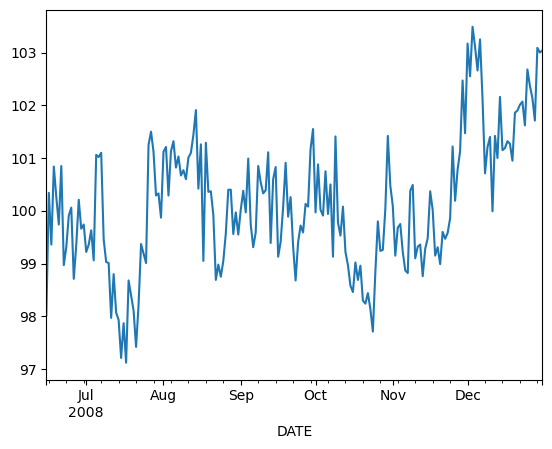

In [13]:
ar_df_2['DATE'] = pd.to_datetime(ar_df_2['Date'], format='%d%b%Y')

ar_ts_2 = pd.Series(ar_df_2['Y'].values, index=ar_df_2['DATE'])

ar_ts_2.plot()

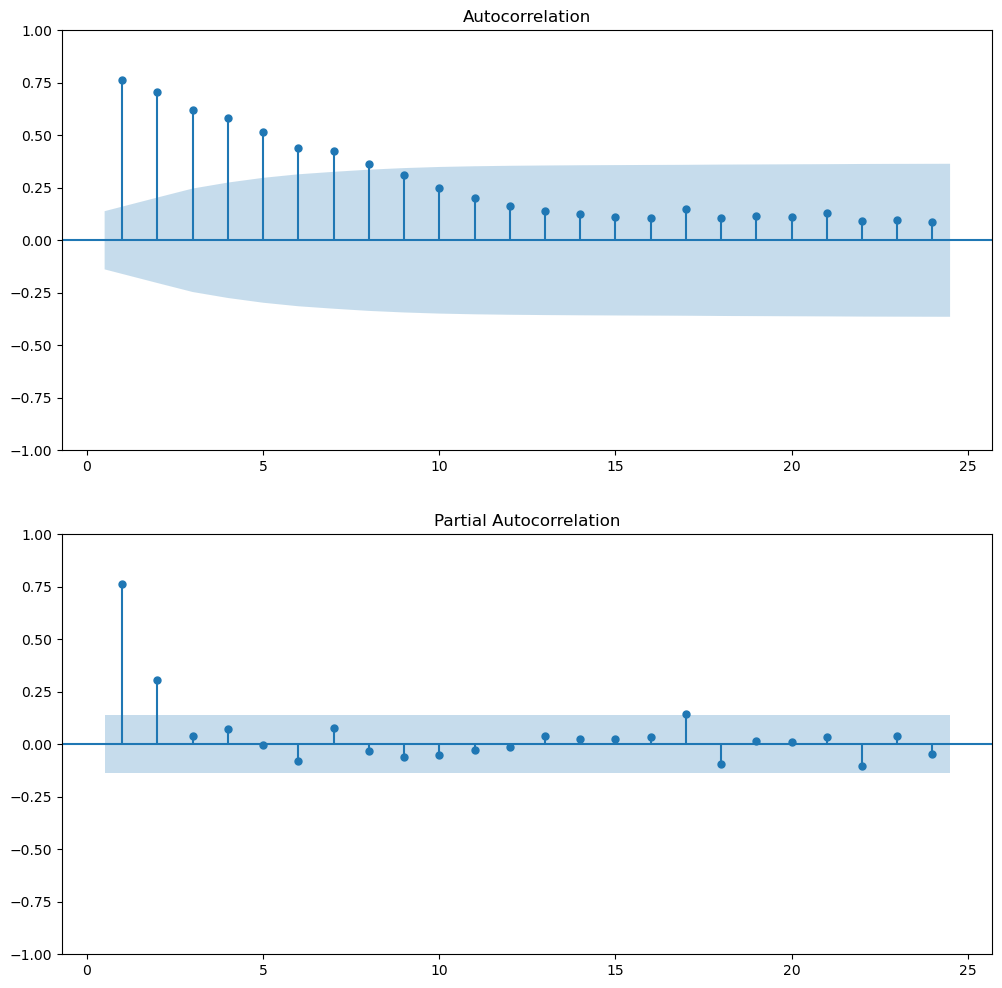

In [14]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(ar_ts_2, ax=ax1, zero=False)
plot_pacf(ar_ts_2, ax=ax2, zero=False)
plt.show()

In [17]:
sm.stats.acorr_ljungbox(ar_ts_2, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,563.14271,1.378632e-114


In [18]:
adfuller(ar_ts_2, regression='c')

(-2.8620574499646,
 0.0499414543060636,
 1,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 417.4713510923384)

In [19]:
fit_ar2 = ARIMA(ar_ts_2, order=(2,0,0)).fit()

print(fit_ar2.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -227.765
Date:                Mon, 30 Sep 2024   AIC                            463.530
Time:                        10:27:00   BIC                            476.723
Sample:                    06-15-2008   HQIC                           468.869
                         - 12-31-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.1927      0.358    280.155      0.000      99.492     100.894
ar.L1          0.5332      0.071      7.489      0.000       0.394       0.673
ar.L2          0.3309      0.068      4.838      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


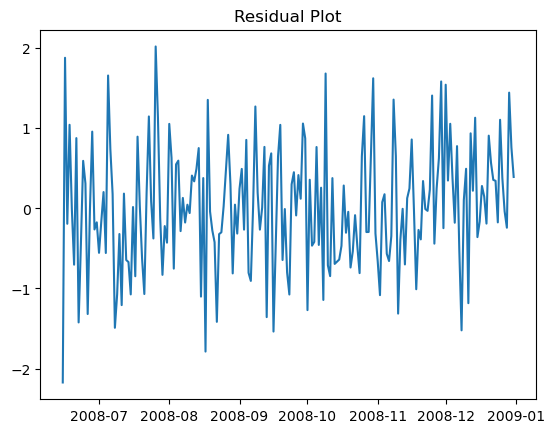

In [20]:
residuals = fit_ar2.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

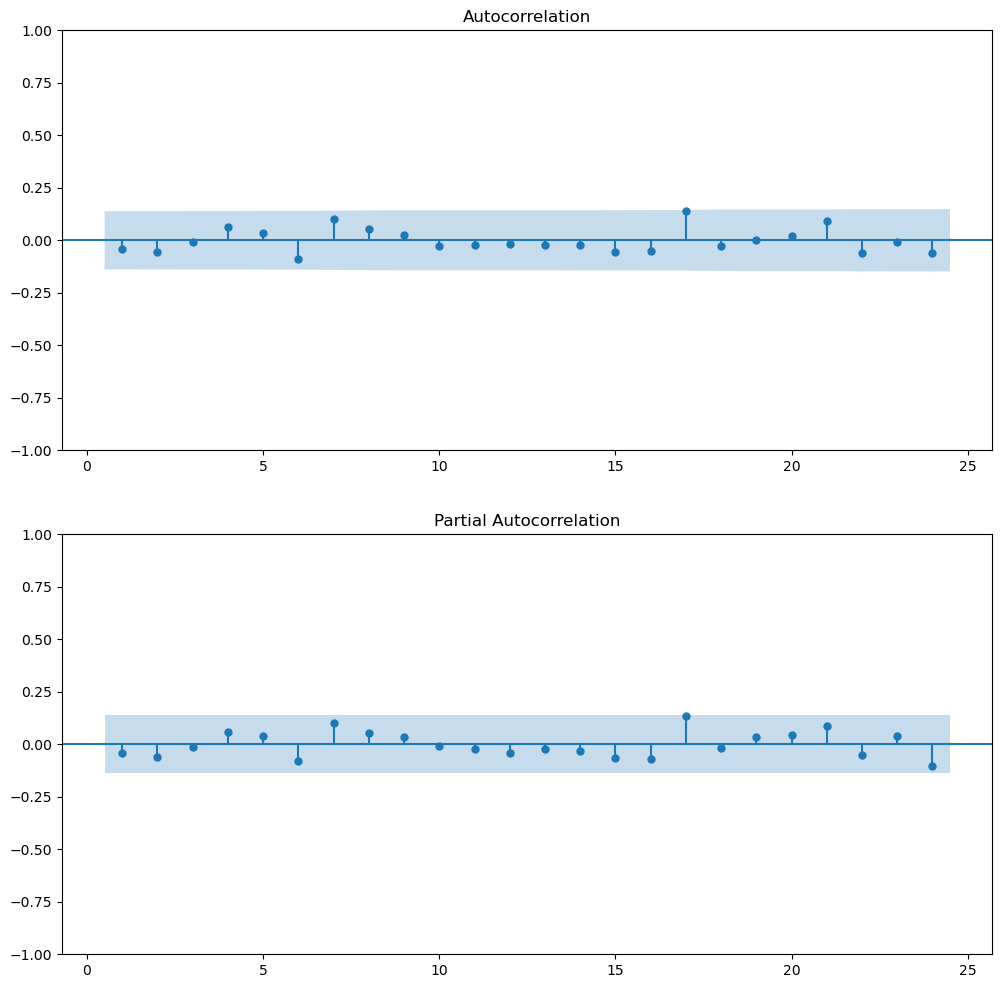

In [21]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()

In [22]:
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,6.843747,0.740109


In [23]:
ar_df_3 = pd.read_csv('arma_series03.csv')
ar_df_3.head()

,Date,Y
0,01MAY1992,100.08
1,01JUN1992,100.24
2,01JUL1992,99.79
3,01AUG1992,100.16
4,01SEP1992,99.91


<Axes: xlabel='DATE'>

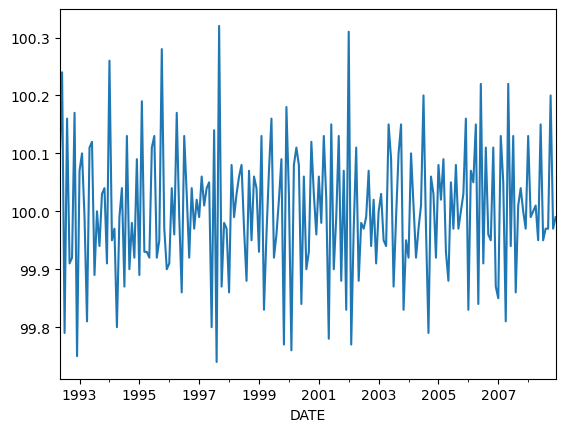

In [24]:
ar_df_3['DATE'] = pd.to_datetime(ar_df_3['Date'], format='%d%b%Y')

ar_ts_3 = pd.Series(ar_df_3['Y'].values, index=ar_df_3['DATE'])

ar_ts_3.plot()

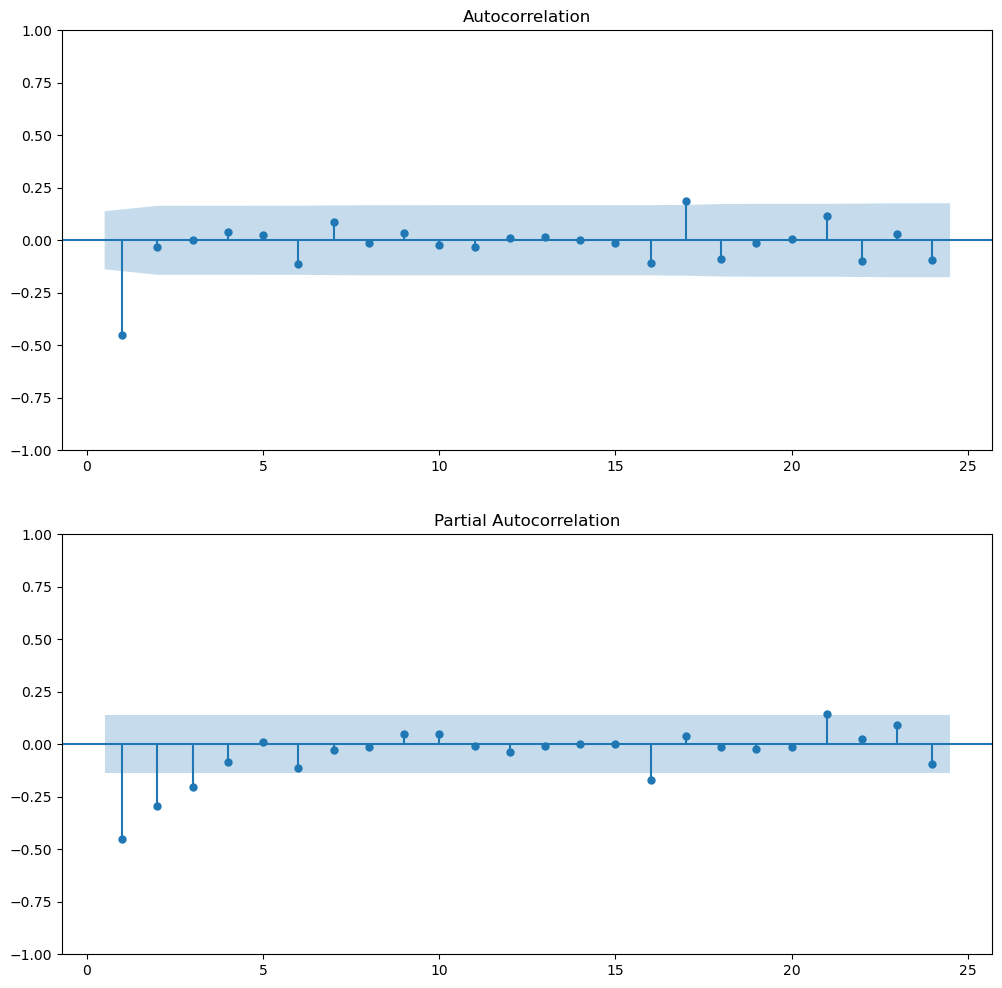

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(ar_ts_3, ax=ax1, zero=False)
plot_pacf(ar_ts_3, ax=ax2, zero=False)
plt.show()

In [27]:
fit_ar3 = ARIMA(ar_ts_3, order=(3,0,0)).fit()

print(fit_ar3.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(3, 0, 0)   Log Likelihood                 188.671
Date:                Mon, 30 Sep 2024   AIC                           -367.343
Time:                        10:32:10   BIC                           -350.851
Sample:                    05-01-1992   HQIC                          -360.669
                         - 12-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0018      0.003   3.33e+04      0.000      99.996     100.008
ar.L1         -0.6518      0.077     -8.433      0.000      -0.803      -0.500
ar.L2         -0.4313      0.086     -5.029      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


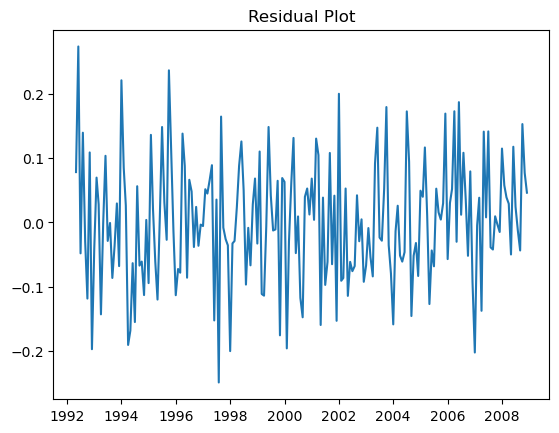

In [31]:
residuals = fit_ar3.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

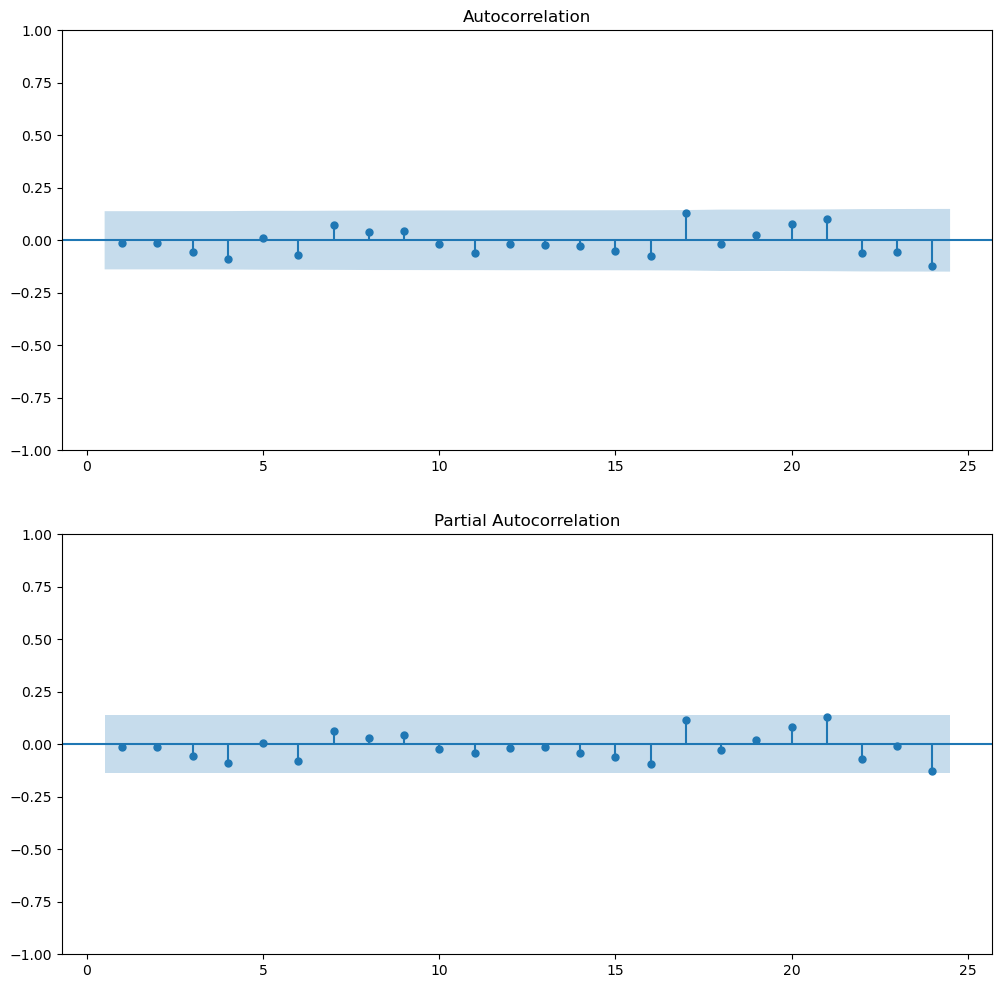

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()

In [33]:
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.358758,0.865961


In [34]:
ar_df_4 = pd.read_csv('arma_series04.csv')
ar_df_4.head()

,Date,Y
0,08MAY2005,200.73
1,09MAY2005,202.07
2,10MAY2005,198.22
3,11MAY2005,200.57
4,12MAY2005,199.43


<Axes: xlabel='DATE'>

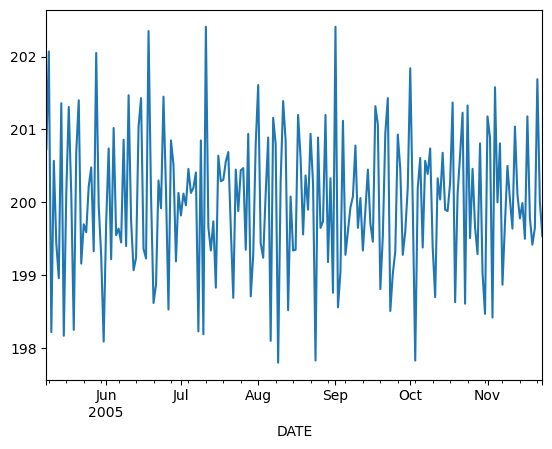

In [35]:
ar_df_4['DATE'] = pd.to_datetime(ar_df_4['Date'], format='%d%b%Y')

ar_ts_4 = pd.Series(ar_df_4['Y'].values, index=ar_df_4['DATE'])

ar_ts_4.plot()

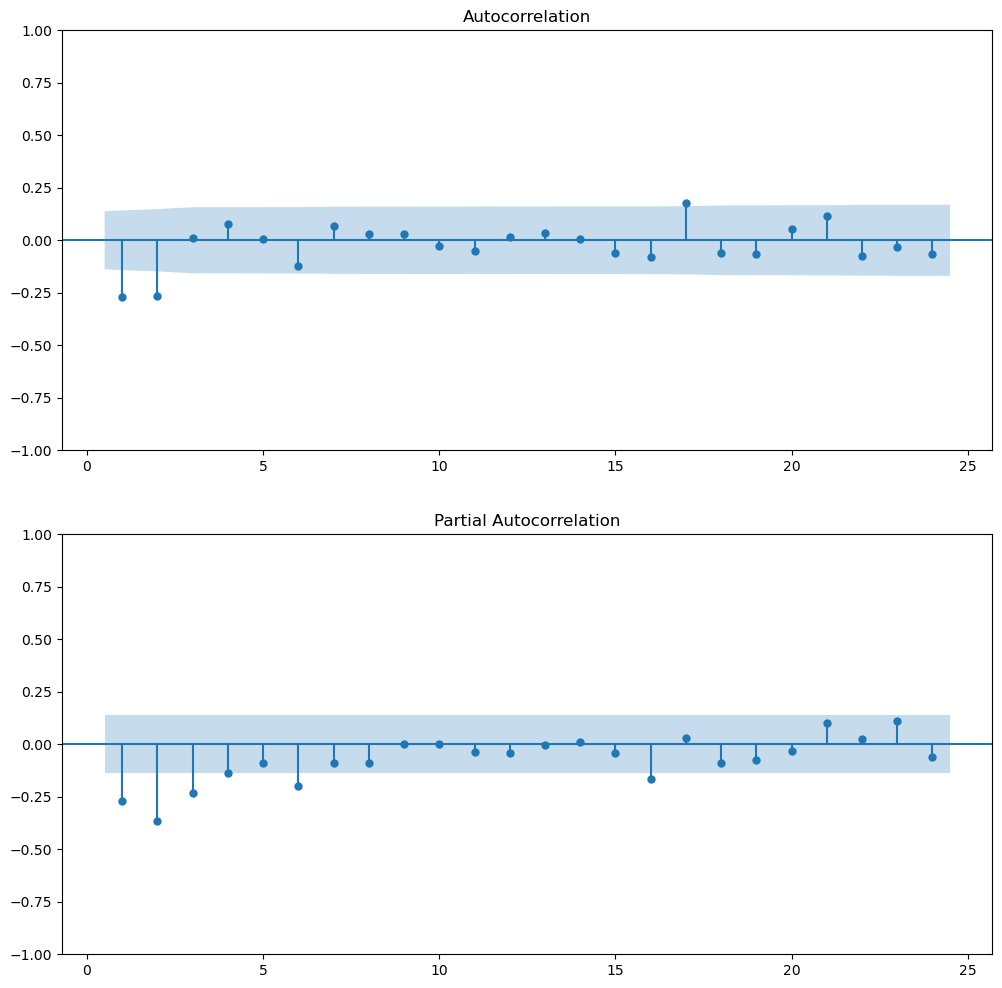

In [36]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(ar_ts_4, ax=ax1, zero=False)
plot_pacf(ar_ts_4, ax=ax2, zero=False)
plt.show()

In [37]:
adfuller(ar_ts_4, regression='c')

(-9.470803042774545,
 4.1113551641336666e-16,
 5,
 194,
 {'1%': -3.4645146202692527,
  '5%': -2.8765564361715534,
  '10%': -2.5747745328940375},
 446.9913032265908)

In [45]:
fit_ar4 = ARIMA(ar_ts_4, order=(2,0,1)).fit()

print(fit_ar4.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -239.220
Date:                Mon, 30 Sep 2024   AIC                            488.441
Time:                        10:41:40   BIC                            504.932
Sample:                    05-08-2005   HQIC                           495.115
                         - 11-23-2005                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.0059      0.012    1.7e+04      0.000     199.983     200.029
ar.L1          0.2370      0.097      2.447      0.014       0.047       0.427
ar.L2         -0.1916      0.083     -2.298      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


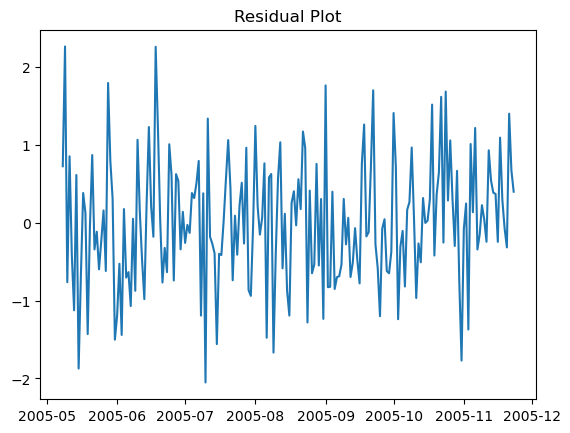

In [46]:
residuals = fit_ar4.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

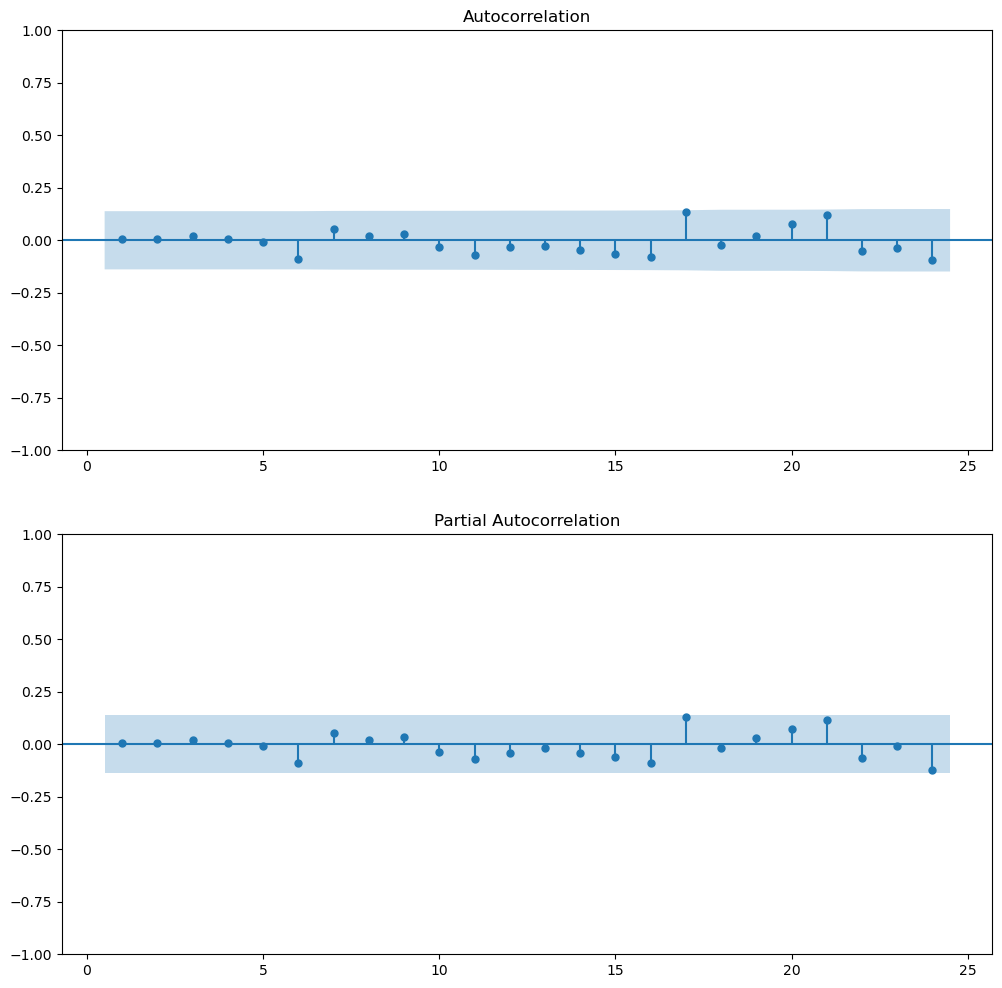

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()

In [48]:
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,2.83958,0.984951


In [49]:
ar_df_5 = pd.read_csv('arma_series05.csv')
ar_df_5.head()

,Date,Y
0,01MAY1992,99.79
1,01JUN1992,102.14
2,01JUL1992,99.94
3,01AUG1992,102.47
4,01SEP1992,100.80


<Axes: xlabel='DATE'>

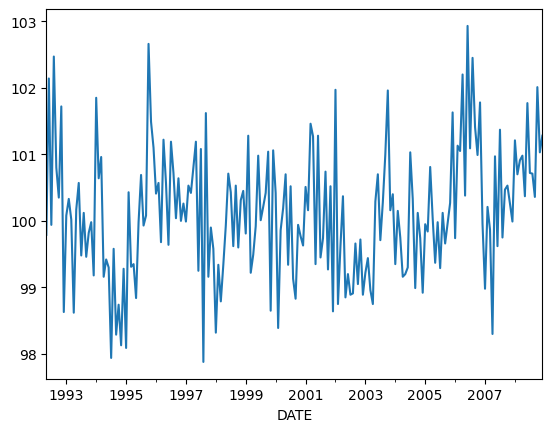

In [50]:
ar_df_5['DATE'] = pd.to_datetime(ar_df_5['Date'], format='%d%b%Y')

ar_ts_5 = pd.Series(ar_df_5['Y'].values, index=ar_df_5['DATE'])

ar_ts_5.plot()

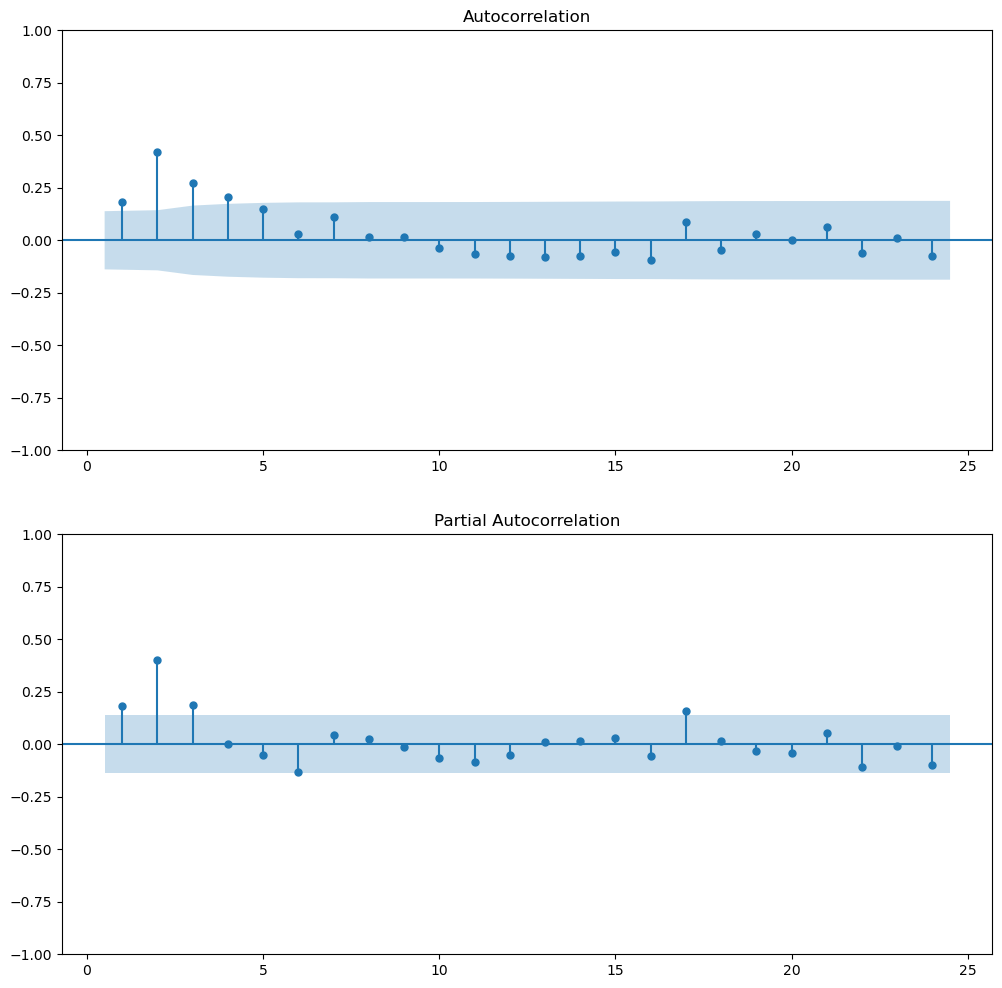

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(ar_ts_5, ax=ax1, zero=False)
plot_pacf(ar_ts_5, ax=ax2, zero=False)
plt.show()

In [52]:
adfuller(ar_ts_5, regression='c')

(-4.242887708839928,
 0.000557006961531736,
 2,
 197,
 {'1%': -3.463987334463603,
  '5%': -2.8763259091636213,
  '10%': -2.5746515171738515},
 463.7134902683071)

In [59]:
fit_ar5 = ARIMA(ar_ts_5, order=(1,0,2)).fit()

print(fit_ar5.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -249.546
Date:                Mon, 30 Sep 2024   AIC                            509.092
Time:                        10:50:14   BIC                            525.584
Sample:                    05-01-1992   HQIC                           515.766
                         - 12-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.1364      0.139    722.880      0.000      99.865     100.408
ar.L1          0.6913      0.097      7.147      0.000       0.502       0.881
ma.L1         -0.6736      0.108     -6.241      0.0

c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\trush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


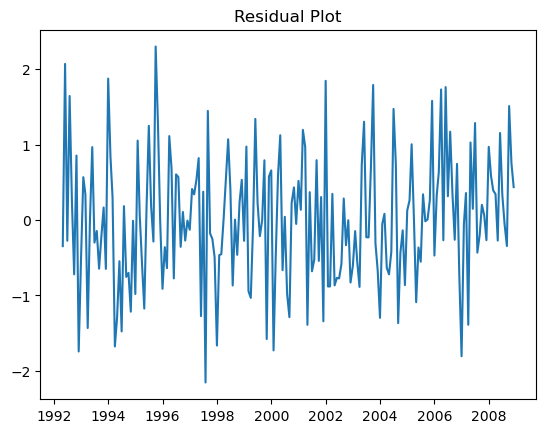

In [60]:
residuals = fit_ar5.resid
plt.plot(residuals)
plt.title('Residual Plot')
plt.show()

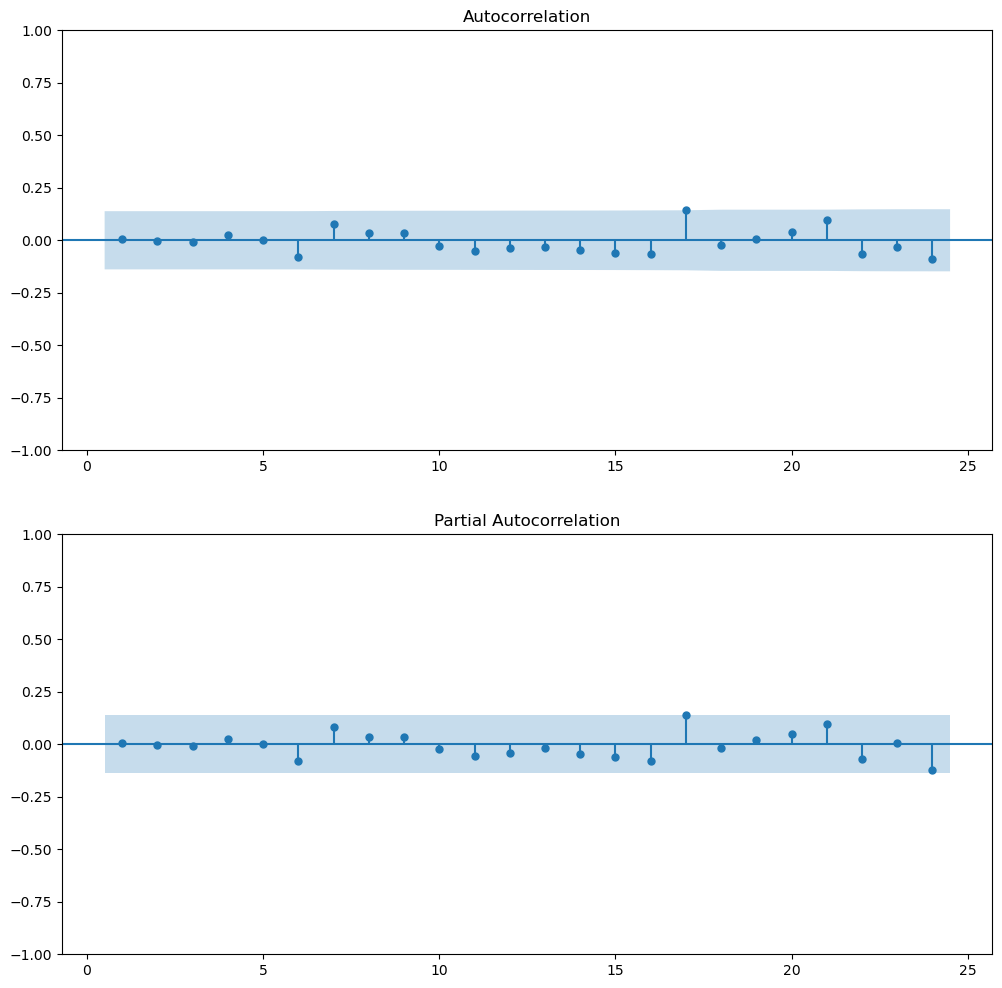

In [61]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,12))

plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()

In [62]:
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,3.459053,0.96847
